# "Understanding Socioeconomic Dynamics: Exploring Relative Poverty, Negative Net Wealth, and Net Wealth Trends"

The aim of this project is analysis the relative poverty and it various form of wealth (positive and negative) in Denmark: Net Wealth and Negative Net Wealth. In the following sections we will present an exploration of trends and patters in these variables to gain insights into the socioeconomic dynamics not only in group of municipalities of Denmark by also in group of ages.

Additionally, according to the 2023 Country Report, the Danish economy has experienced robust growth, only interrupted by significant fluctuations during the COVID-19. Denmark recorded a current account surplus of 13.1% of GDP in 2022, mainly because of a temporary spike in sea freight rates. 

In the context of Covid-19, the removal of restrictions has boosted employment, productivity, and investment, also Denmark has introduced a range of social benefits that target older people, students, and low-income groups, as well as health-related policies, making the relative poverty decreased, from 4.4% (2019) to 3.7% (2022).

However, even though the relative poverty reduced, Denmark presents some challenges regarding the accessibility of housing, for example. This factor, among others, can explain the reason for an increase of negative net wealth in the country due to the increase of materials mainly during Covid-19 (overall represents 41% of their income for a single person).

This project will analyse 3 variables from 2015 to 2022 in Denmark:

1. **Relative poverty**: Poverty measuared in relation to the general standard of living in society. This variable combines low income, low wealth, excluding students living away fromhome, person without income, and young people who moved from non-relative poor households to realtive poor. This variable is measured in percentage of population. 
According the statistics from Denmark, 3.7% of population were relatively poor in 2022. 
2. **Negative net wealth**: Represent the condition where liabilities (debts, loabs, mortgages) exceed assests (cash, savings, investments, property) resulting in a net deficit. This variable is measured in percentage of population. 
According the statistics from Denmark, 9.6% of population were relatively poor in 2022. 
3. **Net wealth**: This variable is the value of assets owned by an individual, household, or entity after subtracting all debts and obligations. This variable is measured in DKK.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Read and clean data

For clarity reasons, in the code below we First show what we do with the first dataset, then we will perform the same code for all the other datasets, the only difference is the age-range considered. We do this to enable us to later merge the data with the different age-range specified. \
This process will be repeated for three different datasets: 
1. Dataset on Relative Poverty
2. Dataset on Net Wealth
3. Dataset on Negative Net Wealth


In [2]:
filename = 'relative_poverty.xlsx'
rp_tot = pd.read_excel(filename, sheet_name= 'Age-total') #import dataset on relative poverty for all age groups
rp_tot

,Unnamed: 0,2015,2016,2017,2018,2019,2020,2021,2022
0,All Denmark,3.6,4.0,4.5,4.4,4.4,4.2,4.0,3.7
1,Capital municipalities,4.0,4.3,4.7,4.7,4.7,4.5,4.3,4.0
2,Metropolitan municipalities,4.0,4.4,5.0,5.1,5.2,5.0,5.0,4.6
3,Provincial municipalities,3.4,3.8,4.3,4.2,4.1,4.0,3.8,3.5
4,Commuter municipalities,2.7,3.2,3.7,3.5,3.5,3.3,3.1,2.9
...,...,...,...,...,...,...,...,...,...
99,Morsø,3.6,4.4,4.5,3.9,3.8,3.5,4.0,3.1
100,Rebild,2.2,2.3,2.8,2.6,2.6,2.5,2.1,1.9
101,Thisted,3.4,3.8,4.2,4.2,4.0,4.0,3.7,3.2
102,Vesthimmerlands,4.0,4.2,4.3,4.4,4.1,3.9,3.7,3.3


In [3]:
# Rename columns by specifying a lambda function
rp_tot.columns = rp_tot.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_rp_tot' if x.isdigit() else x)
rp_tot

,location,2015_rp_tot,2016_rp_tot,2017_rp_tot,2018_rp_tot,2019_rp_tot,2020_rp_tot,2021_rp_tot,2022_rp_tot
0,All Denmark,3.6,4.0,4.5,4.4,4.4,4.2,4.0,3.7
1,Capital municipalities,4.0,4.3,4.7,4.7,4.7,4.5,4.3,4.0
2,Metropolitan municipalities,4.0,4.4,5.0,5.1,5.2,5.0,5.0,4.6
3,Provincial municipalities,3.4,3.8,4.3,4.2,4.1,4.0,3.8,3.5
4,Commuter municipalities,2.7,3.2,3.7,3.5,3.5,3.3,3.1,2.9
...,...,...,...,...,...,...,...,...,...
99,Morsø,3.6,4.4,4.5,3.9,3.8,3.5,4.0,3.1
100,Rebild,2.2,2.3,2.8,2.6,2.6,2.5,2.1,1.9
101,Thisted,3.4,3.8,4.2,4.2,4.0,4.0,3.7,3.2
102,Vesthimmerlands,4.0,4.2,4.3,4.4,4.1,3.9,3.7,3.3


In [4]:
#Here we import all the datasets on relative poverty, but considering the data for different age ranges
rp_17 = pd.read_excel(filename, sheet_name= '0-17')
rp_29 = pd.read_excel(filename, sheet_name= '18-29')
rp_39 = pd.read_excel(filename, sheet_name= '30-39')
rp_49 = pd.read_excel(filename, sheet_name= '40-49')
rp_59 = pd.read_excel(filename, sheet_name= '50-59')
rp_69 = pd.read_excel(filename, sheet_name= '60-69')
rp_79 = pd.read_excel(filename, sheet_name= '70-79')
rp_80 = pd.read_excel(filename, sheet_name= '80-onwards')

#Here we rename all the columns in order to identify which age groups that column is referring to
def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
rp_17 = rename_columns(rp_17, '_rp_17')
rp_29 = rename_columns(rp_29, '_rp_29')
rp_39 = rename_columns(rp_39, '_rp_39')
rp_49 = rename_columns(rp_49, '_rp_49')
rp_59 = rename_columns(rp_59, '_rp_59')
rp_69 = rename_columns(rp_69, '_rp_69')
rp_79 = rename_columns(rp_79, '_rp_79')
rp_80 = rename_columns(rp_80, '_rp_80')

In [5]:
#Here we compute the same operations but using the Net Wealth dataset instead:
filename2 = 'net_wealth.xlsx'
nw_18_over = pd.read_excel(filename2, sheet_name= '18-over')

#Renaming columns
nw_18_over.columns = nw_18_over.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_nw_18_over' if x.isdigit() else x)

#Here we import all the datasets on net-wealth, but considering the data for different age ranges
nw_29 = pd.read_excel(filename2, sheet_name= '18-29')
nw_39 = pd.read_excel(filename2, sheet_name= '30-39')
nw_49 = pd.read_excel(filename2, sheet_name= '40-49')
nw_59 = pd.read_excel(filename2, sheet_name= '50-59')
nw_69 = pd.read_excel(filename2, sheet_name= '60-69')
nw_79 = pd.read_excel(filename2, sheet_name= '70-79')
nw_80 = pd.read_excel(filename2, sheet_name= '80-onwards')

def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
nw_29 = rename_columns(nw_29, '_nw_29')
nw_39 = rename_columns(nw_39, '_nw_39')
nw_49 = rename_columns(nw_49, '_nw_49')
nw_59 = rename_columns(nw_59, '_nw_59')
nw_69 = rename_columns(nw_69, '_nw_69')
nw_79 = rename_columns(nw_79, '_nw_79')
nw_80 = rename_columns(nw_80, '_nw_80')

In [6]:
#Here we compute the same operations but using the Negative Net Dataset instead:
filename3 = 'neg_net_wealth.xlsx'
nnw_18_over = pd.read_excel(filename3, sheet_name= '18-over')

#Renaming columns
nnw_18_over.columns = nnw_18_over.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_nnw_18_over' if x.isdigit() else x)

#Here we import all the datasets on net-wealth, but considering the data for different age ranges
nnw_29 = pd.read_excel(filename3, sheet_name= '18-29')
nnw_39 = pd.read_excel(filename3, sheet_name= '30-39')
nnw_49 = pd.read_excel(filename3, sheet_name= '40-49')
nnw_59 = pd.read_excel(filename3, sheet_name= '50-59')
nnw_69 = pd.read_excel(filename3, sheet_name= '60-69')
nnw_79 = pd.read_excel(filename3, sheet_name= '70-79')
nnw_80 = pd.read_excel(filename3, sheet_name= '80-onwards')

def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
nnw_29 = rename_columns(nnw_29, '_nnw_29')
nnw_39 = rename_columns(nnw_39, '_nnw_39')
nnw_49 = rename_columns(nnw_49, '_nnw_49')
nnw_59 = rename_columns(nnw_59, '_nnw_59')
nnw_69 = rename_columns(nnw_69, '_nnw_69')
nnw_79 = rename_columns(nnw_79, '_nnw_79')
nnw_80 = rename_columns(nnw_80, '_nnw_80')

#So far we have 3 different types of data on relative poverty, net wealth and negative net wealth. 
#Each one of this data are divided in different datasets considering the different age groups

# Merge Datasets

In [7]:
#Here we combine our datasets on relative poverty, in order to have just one with all the different age ranges specified
datasets = [rp_17, rp_29, rp_39, rp_49, rp_59, rp_69, rp_79, rp_80]

# Initialize the merged dataset with the first dataset
merged_rp = rp_tot

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_rp = merged_rp.merge(dataset, on='location')

# Print the merged dataset
merged_rp

,location,2015_rp_tot,2016_rp_tot,2017_rp_tot,2018_rp_tot,2019_rp_tot,2020_rp_tot,2021_rp_tot,2022_rp_tot,2015_rp_17,...,2021_rp_79,2022_rp_79,2015_rp_80,2016_rp_80,2017_rp_80,2018_rp_80,2019_rp_80,2020_rp_80,2021_rp_80,2022_rp_80
0,All Denmark,3.6,4.0,4.5,4.4,4.4,4.2,4.0,3.7,3.8,...,0.8,0.7,0.7,0.7,0.7,0.7,0.7,0.8,1.0,0.8
1,Capital municipalities,4.0,4.3,4.7,4.7,4.7,4.5,4.3,4.0,3.9,...,1.1,0.9,1.0,0.9,1.0,0.9,0.9,1.0,1.3,1.0
2,Metropolitan municipalities,4.0,4.4,5.0,5.1,5.2,5.0,5.0,4.6,4.1,...,0.8,0.6,0.9,0.8,0.9,0.7,0.9,0.8,1.2,0.9
3,Provincial municipalities,3.4,3.8,4.3,4.2,4.1,4.0,3.8,3.5,3.5,...,0.7,0.6,0.6,0.6,0.7,0.6,0.7,0.7,0.9,0.7
4,Commuter municipalities,2.7,3.2,3.7,3.5,3.5,3.3,3.1,2.9,3.0,...,0.6,0.5,0.7,0.6,0.6,0.6,0.6,0.7,0.9,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Morsø,3.6,4.4,4.5,3.9,3.8,3.5,4.0,3.1,5.7,...,1.0,0.4,0.4,0.3,0.4,0.4,0.8,0.2,0.8,0.4
100,Rebild,2.2,2.3,2.8,2.6,2.6,2.5,2.1,1.9,2.1,...,0.7,0.4,0.2,0.4,0.4,0.3,0.2,0.8,0.7,0.6
101,Thisted,3.4,3.8,4.2,4.2,4.0,4.0,3.7,3.2,4.5,...,0.7,0.7,0.4,0.4,0.5,0.5,0.5,0.7,0.9,0.6
102,Vesthimmerlands,4.0,4.2,4.3,4.4,4.1,3.9,3.7,3.3,5.6,...,0.8,0.5,0.3,0.4,0.2,0.5,0.6,1.0,0.7,0.6


In [8]:
#Here we sliced the dataset for relative poverty in order to keep just the first rows,
#excluding all the municipalities
merged_rp_final = merged_rp.iloc[:7]

#Here we just flip the dataset, to make it easier to read
rp_long = pd.melt(merged_rp_final, id_vars=['location'], var_name='year', value_name='relative_poverty')
merged_rp_final #this is the same initial shape
rp_long #this is flipped


,location,year,relative_poverty
0,All Denmark,2015_rp_tot,3.6
1,Capital municipalities,2015_rp_tot,4.0
2,Metropolitan municipalities,2015_rp_tot,4.0
3,Provincial municipalities,2015_rp_tot,3.4
4,Commuter municipalities,2015_rp_tot,2.7
...,...,...,...
499,Metropolitan municipalities,2022_rp_80,0.9
500,Provincial municipalities,2022_rp_80,0.7
501,Commuter municipalities,2022_rp_80,0.7
502,Rural municipalities,2022_rp_80,0.7


In [9]:
#Then we split this dataset to create two different columns for year and age-group:

# Perform the split operation and assign it to a temporary variable
split_columns = rp_long['year'].str.split('_', expand=True)

# Combine the last two parts for the 'age_group'
split_columns['age_group'] = split_columns[1] + "_" + split_columns[2]

# Now, assign the first part to 'year' and the combined part to 'age_group'
rp_long['year'] = split_columns[0].astype(int)  # Convert 'year' to an integer
rp_long['age_group'] = split_columns['age_group']

# Check the DataFrame to ensure the changes are as expected
print(rp_long.head())

                      location  year  relative_poverty age_group
0                  All Denmark  2015               3.6    rp_tot
1       Capital municipalities  2015               4.0    rp_tot
2  Metropolitan municipalities  2015               4.0    rp_tot
3    Provincial municipalities  2015               3.4    rp_tot
4      Commuter municipalities  2015               2.7    rp_tot


In [10]:
#we perform the same coding to the datasets on net wealth and negative net wealth:

#Mearging datasets on net wealth:
datasets = [nw_29, nw_39, nw_49, nw_59, nw_69, nw_79, nw_80]

# Initialize the merged dataset with the first dataset
merged_nw = nw_18_over

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_nw = merged_nw.merge(dataset, on='location')

#Here we sliced the dataset for net-wealth in order to keep just the first rows
merged_nw_final = merged_nw.iloc[:7]
merged_nw_final

#Here we just flip the dataset, to make it easier to read
nw_long = pd.melt(merged_nw_final, id_vars=['location'], var_name='year', value_name='net_wealth')
nw_long

# Perform the split operation and assign it to a temporary variable
split_columns = nw_long['year'].str.split('_', expand=True)

# Combine the last two parts for the 'age_group'
split_columns['age_group'] = split_columns[1] + "_" + split_columns[2]

# Now, assign the first part to 'year' and the combined part to 'age_group'
nw_long['year'] = split_columns[0].astype(int)  # Convert 'year' to an integer
nw_long['age_group'] = split_columns['age_group']

In [11]:
#Merging datasets on negative net wealth
datasets = [nnw_29, nnw_39, nnw_49, nnw_59, nnw_69, nnw_79, nnw_80]

# Initialize the merged dataset with the first dataset
merged_nnw = nnw_18_over

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_nnw = merged_nnw.merge(dataset, on='location')

merged_nnw_final = merged_nnw.iloc[:7]
nnw_long = pd.melt(merged_nnw_final, id_vars=['location'], var_name='year', value_name='negative_net_wealth')
merged_nnw_final #this is the same initial shape
nnw_long #this is flipped

# Perform the split operation and assign it to a temporary variable
split_columns = nnw_long['year'].str.split('_', expand=True)

# Combine the last two parts for the 'age_group'
split_columns['age_group'] = split_columns[1] + "_" + split_columns[2]

# Now, assign the first part to 'year' and the combined part to 'age_group'
nnw_long['year'] = split_columns[0].astype(int)  # Convert 'year' to an integer
nnw_long['age_group'] = split_columns['age_group']

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

Explain what you see when moving elements of the interactive plot around. 

# Analysis

3.3 Relation between relative poverty and negative net wealth by groups of municipalities in 2019 and 2022

This section compared the variation of the relative poverty and the debt accumulation mainly comparing the year before and after COVID-19.

When analyzing the dataset on relative poverty it is interesting to plot it over time by types of municipality. To do this we consider all age groups together. What we can see from the graph below is that the areas with the highest relative poverty are the Capital and the Metropolitan municipalities, with Copenhagen standing out with its high rate.\
Moreover, it is possible to see from this graph that in general since 2019 relative poverty seems to be diminishing all over Denmark, which is interesting since the years after 2019 can be identifyed as the post-Covid years.\
When comparing these data with the negative net wealth data, it is possible to identify a similar trend, with people in the Metropolitan municipalities and specifically in Copenhagen displaying the highest share of borrowing, which makes intuitevely sense since the possibility of affording a house in the metropolitan cities can push a lot of people into borrowing more. 

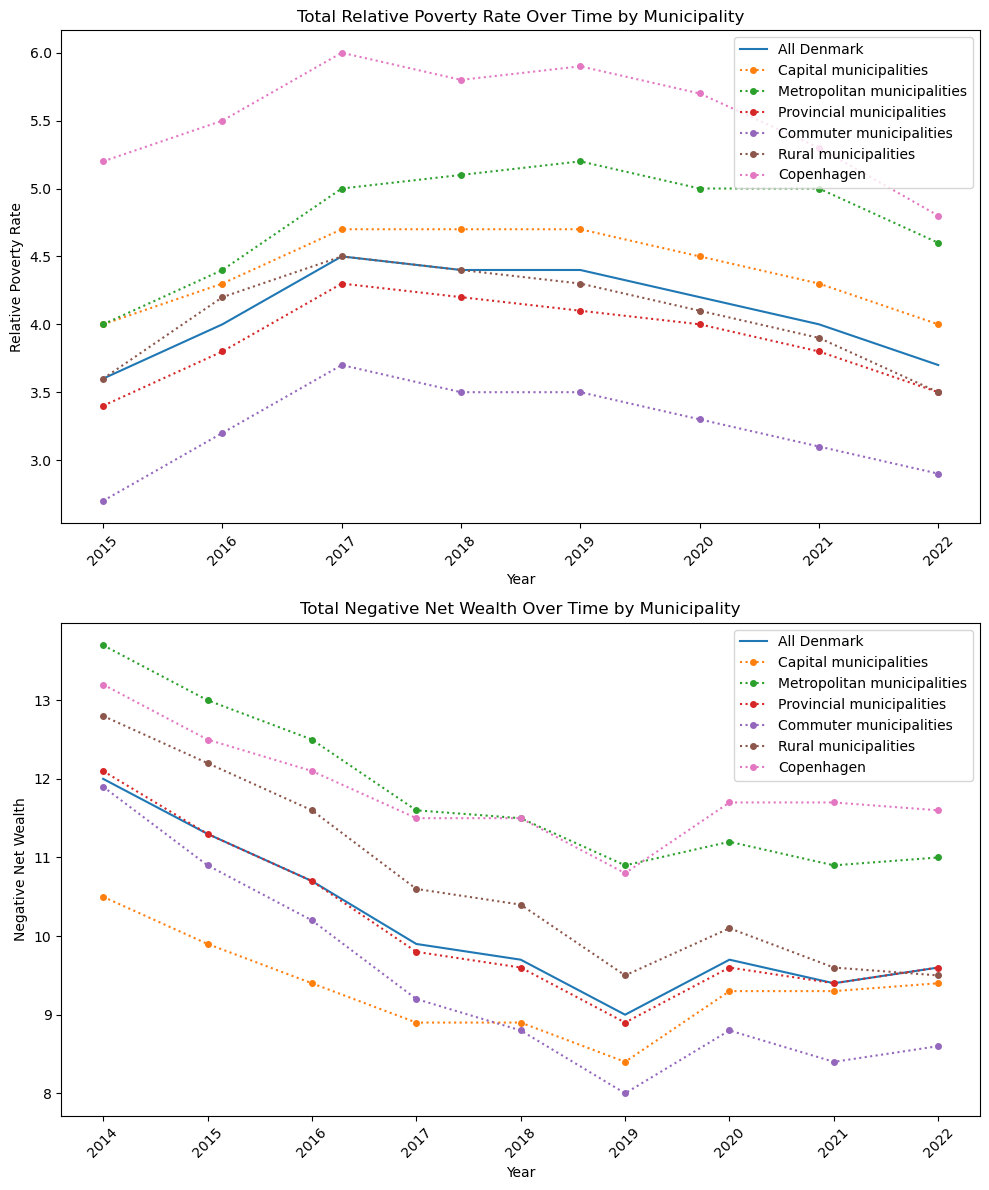

In [29]:
# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot for Total Relative Poverty Rate Over Time by Municipality
rp_tot_data = rp_long[rp_long['age_group'] == 'rp_tot']
for municipality in rp_tot_data['location'].unique():
    data = rp_tot_data[rp_tot_data['location'] == municipality]
    if municipality == 'All Denmark':
        axes[0].plot(data['year'], data['relative_poverty'], label=municipality)
    else:
        axes[0].plot(data['year'], data['relative_poverty'], marker='o', markersize=4, linestyle='dotted', label=municipality)

axes[0].set_xlabel('Year')
axes[0].set_ylabel('Relative Poverty Rate')
axes[0].set_title('Total Relative Poverty Rate Over Time by Municipality')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Plot for Total Negative Net Wealth Over Time by Municipality
nnw_18_data = nnw_long[nnw_long['age_group'] == 'nnw_18']
for municipality in nnw_18_data['location'].unique():
    data = nnw_18_data[nnw_18_data['location'] == municipality]
    if municipality == 'All Denmark':
        axes[1].plot(data['year'], data['negative_net_wealth'], label=municipality)
    else:
        axes[1].plot(data['year'], data['negative_net_wealth'], marker='o', markersize=4, linestyle='dotted', label=municipality)

axes[1].set_xlabel('Year')
axes[1].set_ylabel('Negative Net Wealth')
axes[1].set_title('Total Negative Net Wealth Over Time by Municipality')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Moreover, we can plot the negative net wealth and the relative poverty across age groups in all Denmark. In the graph below be compared pre-Covid and post-Covid data and the results show that younger people are the ones most affected by relative poverty. In particular people in the age group between 18-29 are the highest affected by it, almost doubling the average rate for all ages. For them, in the post-Covid years we can see a trend of decreasing relative poverty, while for most of the other age groups there is no difference over time.\
A similar pattern is also found with regards to negative net wealth, with again younger people displaying higher values. Summarizing younger people are the one that are more in risk of relative poverty and they are also the one with the highest share of negative net wealth.

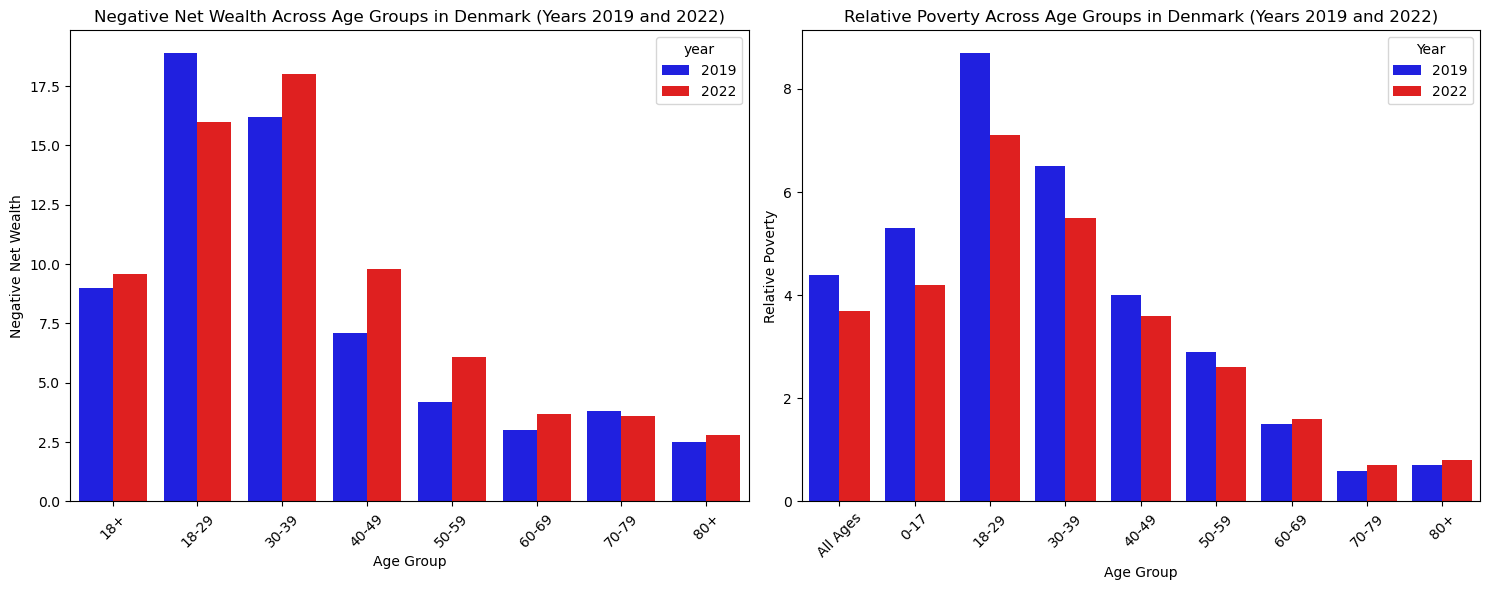

In [28]:
import seaborn as sns
# Filter the DataFrame to include only observations for "All Denmark" and years 2019 and 2022 for negative net wealth
all_denmark_data = nnw_long[(nnw_long['location'] == 'All Denmark') & (nnw_long['year'].isin([2019, 2022]))].copy()
# Convert 'year' column to categorical
all_denmark_data['year'] = all_denmark_data['year'].astype(str)

# Filter the DataFrame to include only observations for "All Denmark" and years 2019 and 2022 for relative poverty
all_denmark_data2 = rp_long[(rp_long['location'] == 'All Denmark') & (rp_long['year'].isin([2019, 2022]))].copy()
# Convert 'year' column to categorical
all_denmark_data2['year'] = all_denmark_data2['year'].astype(str)

# Set custom palette and labels
custom_palette = ["blue", "red"]
custom_labels1 = ['18+', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
custom_labels2 = ['All Ages','0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for negative net wealth
sns.barplot(x='age_group', y='negative_net_wealth', hue='year', data=all_denmark_data, palette=custom_palette, ax=axs[0])
axs[0].set_xlabel('Age Group')
axs[0].set_ylabel('Negative Net Wealth')
axs[0].set_title('Negative Net Wealth Across Age Groups in Denmark (Years 2019 and 2022)')
axs[0].set_xticks(range(len(custom_labels1)))
axs[0].set_xticklabels(custom_labels1, rotation=45)

# Plot for relative poverty
sns.barplot(x='age_group', y='relative_poverty', hue='year', data=all_denmark_data2, palette=custom_palette, ax=axs[1])
axs[1].set_xlabel('Age Group')
axs[1].set_ylabel('Relative Poverty')
axs[1].set_title('Relative Poverty Across Age Groups in Denmark (Years 2019 and 2022)')
axs[1].set_xticks(range(len(custom_labels2)))
axs[1].set_xticklabels(custom_labels2, rotation=45)

# Add legend to the second plot with both years
handles, _ = axs[1].get_legend_handles_labels()
axs[1].legend(handles, ['2019', '2022'], title='Year', loc='best')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [31]:
#Separeting the data bases and show 2019 and 2022 (negative net wealth)
nnw_long
nnw_long_2019_2022 = nnw_long.iloc[[35, 36, 37, 38, 39, 40, 41, 56, 57, 58, 59, 60, 61, 62]]

#Droping the unnecesary variable for the analysis
nnw_long_2019_2022 = nnw_long_2019_2022.drop('age_group', axis=1)

df=nnw_long_2019_2022
df.loc[df['year'] == '2019_nnw_18_over', 'year'] = '2019'
df.loc[df['year'] == '2022_nnw_18_over', 'year'] = '2022'
df.to_csv('nnw_yrs.csv', index=False)
nnw= pd.read_csv('nnw_yrs.csv')
#print(nnw)

#Separeting the data bases and show 2019 and 2022 (relative poverty)
rp_long
rp_long_2019_2022 = rp_long.iloc[[28, 29, 30, 31, 32, 33, 34, 49, 50, 51, 52, 53, 54, 55]]

#Droping the unnecesary variable for the analysis
rp_long_2019_2022 = rp_long_2019_2022.drop('age_group', axis=1)
df=rp_long_2019_2022
df.loc[df['year'] == '2019_rp_tot', 'year'] = '2019'
df.loc[df['year'] == '2022_rp_tot', 'year'] = '2022'
df.to_csv('rp_yrs.csv', index=False)
rp= pd.read_csv('rp_yrs.csv')
#print(rp)

C:\Users\PC\AppData\Local\Temp\ipykernel_31324\43557575.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2019' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df['year'] == '2019_nnw_18_over', 'year'] = '2019'
C:\Users\PC\AppData\Local\Temp\ipykernel_31324\43557575.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2019' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df['year'] == '2019_rp_tot', 'year'] = '2019'


In [30]:
# Merging the relative poverty and negative net wealth data base
merged_rp_nnw = pd.merge(rp, nnw, on=['location', 'year'])
merged_rp_nnw.to_csv('rp_nnw_yrs.csv', index=False)
print(merged_rp_nnw)

                       location  year  relative_poverty  negative_net_wealth
0                   All Denmark  2019               4.4                  9.0
1        Capital municipalities  2019               4.7                  8.4
2   Metropolitan municipalities  2019               5.2                 10.9
3     Provincial municipalities  2019               4.1                  8.9
4       Commuter municipalities  2019               3.5                  8.0
5          Rural municipalities  2019               4.3                  9.5
6                    Copenhagen  2019               5.9                 10.8
7                   All Denmark  2022               3.7                  9.6
8        Capital municipalities  2022               4.0                  9.4
9   Metropolitan municipalities  2022               4.6                 11.0
10    Provincial municipalities  2022               3.5                  9.6
11      Commuter municipalities  2022               2.9                  8.6

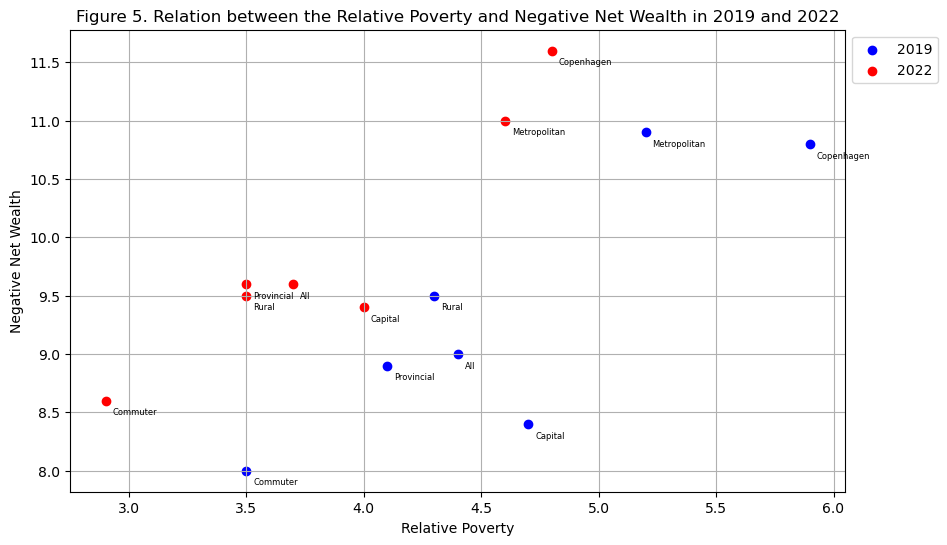

In [24]:
#Ploting the relative poverty and negative net wealth for 2019 and 2022
rp_nnw = merged_rp_nnw
rp_nnw_2019 = merged_rp_nnw[merged_rp_nnw['year'] == 2019]
rp_nnw_2022 = merged_rp_nnw[merged_rp_nnw['year'] == 2022]

# Extract variables for 2019
location_2019 = rp_nnw_2019['location']
relative_poverty_2019 = rp_nnw_2019['relative_poverty']
negative_net_wealth_2019 = rp_nnw_2019['negative_net_wealth']

# Extract variables for 2022
location_2022 = rp_nnw_2022['location']
relative_poverty_2022 = rp_nnw_2022['relative_poverty']
negative_net_wealth_2022 = rp_nnw_2022['negative_net_wealth']

# Plot scatter plot for 2019 (blue color)
plt.figure(figsize=(10, 6))
plt.scatter(relative_poverty_2019, negative_net_wealth_2019, color='blue', label='2019')

# Plot scatter plot for 2022 (red color)
plt.scatter(relative_poverty_2022, negative_net_wealth_2022, color='red', label='2022')

for i, txt in enumerate(location_2019):
    plt.annotate(txt.split()[0], (relative_poverty_2019.iloc[i], negative_net_wealth_2019.iloc[i]), fontsize=6, xytext=(5,-10), textcoords='offset points')

# Annotate each point with the corresponding location for 2022
for i, txt in enumerate(location_2022):
    plt.annotate(txt.split()[0], (relative_poverty_2022.iloc[i], negative_net_wealth_2022.iloc[i]), fontsize=6, xytext=(5,-10), textcoords='offset points')

plt.grid(True)
plt.title('Figure 5. Relation between the Relative Poverty and Negative Net Wealth in 2019 and 2022')
plt.xlabel('Relative Poverty')
plt.ylabel('Negative Net Wealth')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Figure 5 shows that although relative poverty reduced in 2022 before COVID-19 compared to 2019 (previous COVID-19), the negative net wealth increased in all group municipalities and the country: Relative poverty from 4.4% to 3.7% and the accumulation of debt from 9.0% to 9.6% in 2019 and 2022, respectively.

The changes could be explained because Denmark experienced an economic recovery in 2022 because of the increase in consumer spending, investment, effective social welfare programs, and reduced poverty levels even in the face of economic challenges. However, debt accumulation increased mainly in younger generations (see Figure X) because of different factors: rising mortgage debt in housing, difficulties in accessing a job, and increasing cost of living. An example of this is Copenhagen municipality which experienced an increase of negative net wealth in comparison to other municipalities (from 10.8% in 2019 to 11.6% in 2022).

# Conclusion

ADD CONCISE CONLUSION.